# Requirements

1) Install libraries to run code

2) The game can be run just by running the last cell along with it's saved trained .pkl model file

In [0]:
!pip install gym
!apt-get update && apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev
!pip install stable-baselines
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev xvfb xorg-dev python-opengl libboost-all-dev libsdl2-dev swig

!pip install pyvirtualdisplay
!pip install gym
!pip install "gym[atari]"
!pip install piglet



In [0]:
import os

import gym
import numpy as np
import matplotlib.pyplot as plt
import time

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines.deepq.policies import LnMlpPolicy
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import DQN   # Stable baselines DQN implementation

/home/pritish/miniconda3/envs/py32/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Define a Callback Function

Called after each step to store rewards

In [0]:
best_mean_reward, n_steps = -np.inf, 0

def callback(_locals, _globals):
    """
    Callback called at each step (for DQN an others) or after n steps (see ACER or PPO2)
    :param _locals: (dict)
    :param _globals: (dict)
    """
    global n_steps, best_mean_reward
    # Print stats every 1000 calls
    if (n_steps + 1) % 1000 == 0:
        # Evaluate policy performance
        x, y = ts2xy(load_results(log_dir), 'timesteps')
        if len(x) > 0:
            mean_reward = np.mean(y[-100:])
            #print(x[-1], 'timesteps')
            #print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(best_mean_reward, mean_reward))

            # New best model, you could save the agent here
            if mean_reward > best_mean_reward:
                best_mean_reward = mean_reward
                # Example for saving best model
                print("Saving new best model at %d"%x[-1])
                _locals['self'].save('deepq_MountainCar-v0')
    n_steps += 1
    return True

# Initialise Environment

In [0]:
# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

env_name = 'MountainCar-v0'
env = gym.make(env_name)
# Monitor training
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


# Training using DQN with layer normalised MLP Policy 

In [0]:
model = DQN(LnMlpPolicy, env, verbose=1)

start_time = time.time()
model.learn(total_timesteps=100000,callback=callback) # Run for 100000 steps on DQN
elapsed_time = time.time() - start_time
print("Time taken: %d s"%elapsed_time)
model.save("deepq_MountainCar")
del model # remove to demonstrate saving and loading

Saving new best model at 800
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 100      |
| mean 100 episode reward | -200     |
| steps                   | 19799    |
--------------------------------------
Saving new best model at 27943
Saving new best model at 28864
Saving new best model at 30817
Saving new best model at 31811
Saving new best model at 32938
Saving new best model at 33822
Saving new best model at 34906
Saving new best model at 35843
Saving new best model at 36982
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 200      |
| mean 100 episode reward | -194     |
| steps                   | 39181    |
--------------------------------------
Saving new best model at 40925
Saving new best model at 41860
Saving new best model at 43976
Saving new best model at 44952
Saving new best model at 45915
Saving new best model at 46950
Saving new best model at 47998
Saving 

# Training Result


Reference:


https://github.com/hill-a/stable-baselines

https://colab.research.google.com/drive/1L_IMo6v0a0ALK8nefZm6PqPSy0vZIWBT

In [0]:
def movingAverage(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = movingAverage(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()

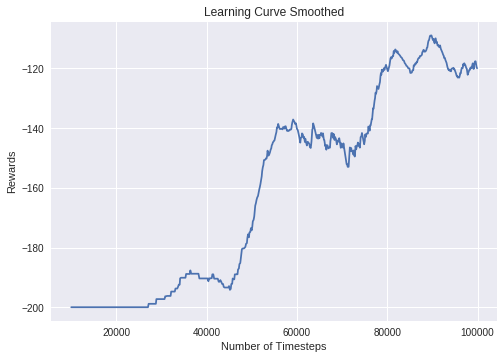

In [0]:
plot_results(log_dir)

# Running trained model

To exit game restart kernel

Runs on linux env with packages installed

In [0]:
model = DQN.load("deepq_MountainCar-v0") # Load trained model

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Loading a model without an environment, this model cannot be trained until it has a valid environment.
